Check also https://www.authorea.com/users/173169/articles/208172-october-25-2017-summary-of-individual-fish-stochastic-swimming-model-and-fitting-results

Check coordinate system.

In [2]:
%matplotlib inline
import numpy as np
import dill as pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import sys
sys.path.append('../')
from numba import jit

from scipy.optimize import minimize, least_squares, curve_fit
from scipy.integrate import quad
from scipy.stats import spearmanr
from sklearn.mixture import GaussianMixture
from calovi import WallModel, SocialModel, KickModel
from plots import *

import sklearn.model_selection as cv
np.set_printoptions(suppress=True)

0.8741897206439544 0.14554872577832126
Multiplier is 0.12723719992823418


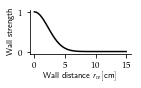

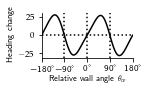

In [3]:
with open('../../models/calovi_wall.model', 'rb') as file:
    wall_model = pickle.load(file)
    
def get_norm_const(OCur, angles):
    return 1/(2*np.pi) * quad(lambda a: OCur(a)**2, -np.pi, np.pi)[0]

fCur = lambda dist: wall_model.wall_force(dist)
OCur = lambda angle: wall_model.wall_repulsion(angle)
norm_const = get_norm_const(OCur, np.linspace(-np.pi, np.pi))
#norm_const = 1.0/wall_model.scale
print(wall_model.scale, norm_const)
print(f"Multiplier is {norm_const * wall_model.scale}")

fig, ax = plt.subplots(figsize=get_figsize(col_widths['paper'], wf=0.5) )    
ax.plot(np.linspace(0, 15), fCur(np.linspace(0,15)), c='black')
ax.set_xlabel(r"Wall distance $r_w [\si{\cm}]$")
ax.set_ylabel("Wall strength")
ax.set_xticks([0, 5, 10, 15])
fig.tight_layout()
sns.despine(fig, ax)
fig.savefig('../../figures/wall_force.pdf', transparent=True)    

fig, ax = plt.subplots(figsize=get_figsize(col_widths['paper'], wf=0.5))
ax.plot(np.rad2deg(np.linspace(-np.pi, np.pi, num=100)), 
        np.rad2deg(OCur(np.linspace(-np.pi, np.pi, num=100)))*wall_model.scale,
        c='black')
plt.axhline(0, linestyle='dotted', c='black')
ax.axvline(90, linestyle='dotted', c='black')
ax.axvline(0.0, linestyle='dotted', c='black')
ax.axvline(-90, linestyle='dotted', c='black')
x_ticks = [-180, -90, 0, 90, 180]
ax.set_xticks(x_ticks)
ax.set_xticklabels([r"\ang{-180}",r"\ang{-90}",r"\ang{0}",r"\ang{90}",r"\ang{180}" ])
ax.set_xlim(-180, 180)
ax.set_xlabel(r"Relative wall angle $\theta_w$")
ax.set_ylabel(r"Heading change")
fig.tight_layout()
sns.despine(fig, ax)
fig.savefig('../../figures/wall_odd.pdf', transparent=True)
